## 1.

*Recogiendo los datos de coronavirus de la página https://ourworldindata.org/coronavirus-source-data* 

A partir de la letra de tu DNI, elige al país que empieza por dicha letra que más fallecidos tenga. Si el país elegido no está entre el top 20 de fallecidos, elige como país España.

En este caso, utilizaremos las columnas:

- Nuevos casos
- Nuevos fallecidos
- Población
- Fallecidos totales
- Casos totales

La fecha debe estar en el índice.

1. Representa todas las columnas en un gráfica con diferentes magnitudes en el eje y para su correcta visualización.

2. Elimina la columna "Población".

3. Entrena los algoritmos de regresión que hemos visto hasta ahora para predecir dos columnas por separado: Nuevos casos y Nuevos fallecidos. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento. ¿Qué error se comete? ¿crees que los algoritmos de ML vistos hasta ahora son buenos para realizar un forecast de una serie temporal viendo los resultados?

4. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones = 23 y n_repeats = 7 para este ejercicio y solo para la columna "nuevos casos".

In [54]:
import numpy as np 
import pandas as pd 


In [55]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index


In [56]:

df1 = df.drop(df.columns.difference(["new_cases",'new_deaths','total_deaths','total_cases','population']), 1)
df1

,total_cases,new_cases,total_deaths,new_deaths,population
0,1.0,1.0,NaN,NaN,38928341.0
1,1.0,0.0,NaN,NaN,38928341.0
2,1.0,0.0,NaN,NaN,38928341.0
3,1.0,0.0,NaN,NaN,38928341.0
4,1.0,0.0,NaN,NaN,38928341.0
...,...,...,...,...,...
67543,34171.0,207.0,1288.0,19.0,14862927.0
67544,34331.0,160.0,1303.0,15.0,14862927.0
67545,34487.0,156.0,1316.0,13.0,14862927.0
67546,34552.0,65.0,1326.0,10.0,14862927.0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67548 entries, 0 to 67547
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_cases   66953 non-null  float64
 1   new_cases     66951 non-null  float64
 2   total_deaths  58094 non-null  float64
 3   new_deaths    58252 non-null  float64
 4   population    64550 non-null  float64
dtypes: float64(5)
memory usage: 2.6 MB


In [64]:
df1.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,6.695300e+04,66951.000000,5.809400e+04,58252.000000,6.455000e+04
mean,5.374451e+05,5040.466192,1.676817e+04,128.289655,9.012737e+07
std,3.811515e+06,32222.900524,9.660177e+04,707.591636,6.163182e+08
min,1.000000e+00,-46076.000000,1.000000e+00,-1918.000000,8.090000e+02
25%,6.210000e+02,1.000000,3.300000e+01,0.000000,2.722291e+06
50%,6.611000e+03,54.000000,2.110000e+02,1.000000,9.890400e+06
75%,7.270000e+04,623.000000,2.002000e+03,15.000000,3.286627e+07
max,1.064780e+08,858062.000000,2.325512e+06,17882.000000,7.794799e+09


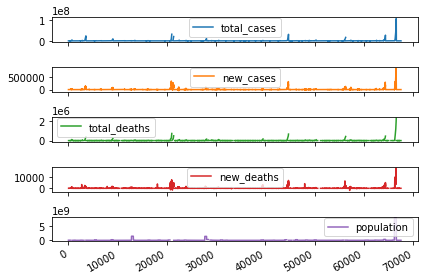

In [65]:
import matplotlib.pyplot as plt

df1.plot(subplots=True)

plt.tight_layout()
plt.show()

In [68]:
df1 = df.drop('population', axis= 1)
df1.dropna(inplace= True)

KeyError: "['population'] not found in axis"

In [69]:
df1.dropna(inplace= True)

In [70]:
df1

,total_cases,new_cases,total_deaths,new_deaths,population
27,34.0,4.0,1.0,1.0,38928341.0
28,41.0,7.0,1.0,0.0,38928341.0
29,43.0,2.0,1.0,0.0,38928341.0
30,76.0,33.0,2.0,1.0,38928341.0
31,80.0,4.0,3.0,1.0,38928341.0
...,...,...,...,...,...
67543,34171.0,207.0,1288.0,19.0,14862927.0
67544,34331.0,160.0,1303.0,15.0,14862927.0
67545,34487.0,156.0,1316.0,13.0,14862927.0
67546,34552.0,65.0,1326.0,10.0,14862927.0


In [62]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LR: nan (nan)
PR: -304808.596215 (4682.052120)
SVR: -414487.791818 (22457.221064)
DTR: -13716.455980 (733.423114)
RFR: -14920.379749 (1173.167096)


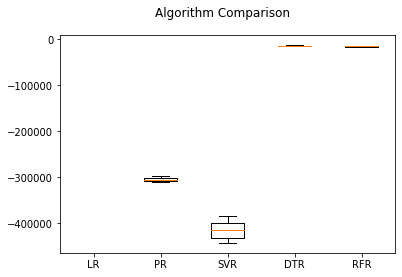

In [71]:
seed = 7
X = np.array(df1.drop(columns=['total_cases']))
y = np.array(df1['total_cases'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, shuffle = True , random_state=7)

    if name == 'PR':  # Por utilizar el modelo del polinomio
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    
    else:  # Para cualquier otro caso
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -1447.522369 (16.940199)
PR: -2827.767343 (27.952163)
SVR: -3911.291909 (298.946983)
DTR: -662.586817 (28.833951)
RFR: -549.326683 (24.910845)


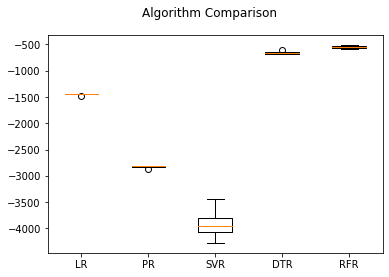

In [72]:
seed = 7
X = np.array(df1.drop(columns=['new_cases']))
y = np.array(df1['new_cases'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, shuffle = True , random_state=7)

    if name == 'PR':  # Por utilizar el modelo del polinomio
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    
    else:  # Para cualquier otro caso
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: -3437.419051 (134.815377)
PR: -8174.503456 (201.245883)
SVR: -11066.564064 (1337.541374)
DTR: -326.336289 (56.720115)
RFR: -333.328008 (30.511685)


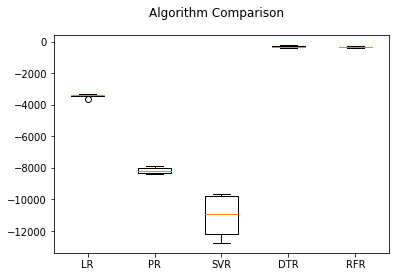

In [73]:
seed = 7
X = np.array(df1.drop(columns=['total_deaths']))
y = np.array(df1['total_deaths'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# prepare models
models = []
models.append(('LR', LinearRegression()))
models.append(('PR', LinearRegression()))
models.append(('SVR', SVR(kernel = 'rbf')))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('RFR', RandomForestRegressor(n_estimators = 10)))

# evaluate each model in turn
results = []
names = []
scoring = 'neg_mean_absolute_error'
for name, model in models:
    kfold = model_selection.KFold(n_splits=4, shuffle = True , random_state=7)

    if name == 'PR':  # Por utilizar el modelo del polinomio
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X_train)
        cv_results = model_selection.cross_val_score(model, X_poly, y_train.ravel(), cv=kfold, scoring=scoring)
    
    else:  # Para cualquier otro caso
        cv_results = model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()